<a href="https://colab.research.google.com/github/DeivinsonSilva/Contributions/blob/main/DEIVINSON_SEVERINO_04_2_AM_Clustering_nSensor_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício: Clustering dados de sensores



### Load the data 

In [1]:
import pandas as pd

nsensor = pd.read_csv('/content/nsensor - nsensor.csv')
nsensor.shape

(744, 37)

### Converta o indice para datetime

In [2]:
nsensor['Data da Coleta'] = nsensor['Data da Coleta'].astype('datetime64')

### Inspecione os dados

In [3]:
#Aqui são analisados 10 linhas aleatórias
nsensor.sample(n=3)

,Data da Coleta,HeliumProbe1Level,HeliumProbe2Level,HeliumRefLevel,HeliumMPSLevel,Link1Voltage,MagnetPressure,SwitchHeaterResistance,QuenchHeater1Resistance,QuenchHeater2Resistance,ColdHeadTemperature,Link1Temperature,Bore1Voltage,Bore1Temperature,ERDUBatteryVoltage,ERDUButtonVoltage,MagnetFieldCurrent,Carbon2Resistance,Carbon3Resistance,Carbon4Resistance,Turret1Voltage,Turret1Temperature,Turret2Voltage,Turret2Temperature,ColdHeadVoltage,PressureHeaterAveragePower,PressureHeaterDutyCycle,Corrente 1,Corrente 2,Corrente 3,Frequencia,Potência 1,Potência 2,Potencia 3,Tensao 1,Tensao 2,Tensao 3
664,2020-07-28 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.322182,42.067790,43.782615,60.001455,25.586769,0.0,0.0,388.420979,390.316084,389.237762
268,2020-07-12 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,2020-07-18 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.448336,21.297413,20.082853,60.002839,11.856839,0.0,0.0,398.341259,399.672727,399.406993


In [4]:
#Aqui são verificados os tipos dos dados
nsensor.dtypes

Data da Coleta                datetime64[ns]
HeliumProbe1Level                    float64
HeliumProbe2Level                    float64
HeliumRefLevel                       float64
HeliumMPSLevel                       float64
Link1Voltage                         float64
MagnetPressure                       float64
SwitchHeaterResistance               float64
QuenchHeater1Resistance              float64
QuenchHeater2Resistance              float64
ColdHeadTemperature                  float64
Link1Temperature                     float64
Bore1Voltage                         float64
Bore1Temperature                     float64
ERDUBatteryVoltage                   float64
ERDUButtonVoltage                    float64
MagnetFieldCurrent                   float64
Carbon2Resistance                    float64
Carbon3Resistance                    float64
Carbon4Resistance                    float64
Turret1Voltage                       float64
Turret1Temperature                   float64
Turret2Vol

In [5]:
#Aqui são verificados os valores faltantes
nsensor.isnull().sum()

Data da Coleta                  0
HeliumProbe1Level             720
HeliumProbe2Level             720
HeliumRefLevel                720
HeliumMPSLevel                720
Link1Voltage                  720
MagnetPressure                720
SwitchHeaterResistance        720
QuenchHeater1Resistance       720
QuenchHeater2Resistance       720
ColdHeadTemperature           720
Link1Temperature              720
Bore1Voltage                  720
Bore1Temperature              720
ERDUBatteryVoltage            720
ERDUButtonVoltage             720
MagnetFieldCurrent            720
Carbon2Resistance             720
Carbon3Resistance             720
Carbon4Resistance             720
Turret1Voltage                720
Turret1Temperature            720
Turret2Voltage                720
Turret2Temperature            720
ColdHeadVoltage               720
PressureHeaterAveragePower    720
PressureHeaterDutyCycle       720
Corrente 1                    264
Corrente 2                    264
Corrente 3    

In [6]:
nsensor.describe()

,HeliumProbe1Level,HeliumProbe2Level,HeliumRefLevel,HeliumMPSLevel,Link1Voltage,MagnetPressure,SwitchHeaterResistance,QuenchHeater1Resistance,QuenchHeater2Resistance,ColdHeadTemperature,Link1Temperature,Bore1Voltage,Bore1Temperature,ERDUBatteryVoltage,ERDUButtonVoltage,MagnetFieldCurrent,Carbon2Resistance,Carbon3Resistance,Carbon4Resistance,Turret1Voltage,Turret1Temperature,Turret2Voltage,Turret2Temperature,ColdHeadVoltage,PressureHeaterAveragePower,PressureHeaterDutyCycle,Corrente 1,Corrente 2,Corrente 3,Frequencia,Potência 1,Potência 2,Potencia 3,Tensao 1,Tensao 2,Tensao 3
count,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00,2.400000e+01,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.0,480.000000,480.000000,480.000000
mean,92.058335,66.383335,0.0,66.383335,1.098875,15.304167,1.308000e+02,23.668333,24.086666,42.412501,43.679169,1.098958,43.645835,23.899583,1.25,5.096500e+02,1144.0,1112.875000,1060.000000,1.084333,52.166668,1.084042,52.370835,1.102625,0.166667,0.0,31.238677,29.632494,28.326597,60.002183,16.917791,0.0,0.0,392.929872,394.243170,393.775400
std,0.092863,0.038069,0.0,0.038069,0.000797,0.020412,2.903300e-14,0.019034,0.024077,3.294437,0.375302,0.000859,0.398889,0.034323,0.00,1.161320e-13,0.0,0.612372,1.769303,0.001129,0.790523,0.001042,0.729192,0.006254,0.816497,0.0,10.619160,9.095939,9.334087,0.008374,6.025864,0.0,0.0,3.537261,3.341259,3.426615
min,92.000000,66.300003,0.0,66.300003,1.097000,15.300000,1.308000e+02,23.660000,24.070000,41.200001,43.200001,1.097000,43.200001,23.799999,1.25,5.096500e+02,1144.0,1110.000000,1057.000000,1.081000,51.700001,1.081000,51.700001,1.081000,0.000000,0.0,20.760028,21.297413,19.648477,59.979315,11.475797,0.0,0.0,383.616783,385.812587,384.548252
25%,92.000000,66.400002,0.0,66.400002,1.099000,15.300000,1.308000e+02,23.660000,24.070000,41.200001,43.600002,1.099000,43.500002,23.900000,1.25,5.096500e+02,1144.0,1113.000000,1060.000000,1.084000,51.700001,1.084000,51.700001,1.105000,0.000000,0.0,22.409416,21.790843,20.473217,59.997262,11.814559,0.0,0.0,390.588811,392.076901,391.482319
50%,92.000000,66.400002,0.0,66.400002,1.099000,15.300000,1.308000e+02,23.660000,24.070000,41.200001,43.600002,1.099000,43.600002,23.900000,1.25,5.096500e+02,1144.0,1113.000000,1061.000000,1.085000,51.700001,1.084000,52.400002,1.105000,0.000000,0.0,23.160664,22.444070,20.807671,60.001923,11.855378,0.0,0.0,392.634516,393.986014,393.507692
75%,92.200005,66.400002,0.0,66.400002,1.099000,15.300000,1.308000e+02,23.660000,24.119999,41.200001,43.600002,1.099250,43.600002,23.909999,1.25,5.096500e+02,1144.0,1113.000000,1061.000000,1.085000,52.400002,1.085000,52.400002,1.105000,0.000000,0.0,42.397252,39.497822,38.221255,60.006864,23.460650,0.0,0.0,394.971329,396.203846,395.781469
max,92.200005,66.400002,0.0,66.400002,1.100000,15.400001,1.308000e+02,23.709999,24.119999,54.500000,44.600002,1.100000,44.600002,23.939999,1.25,5.096500e+02,1144.0,1113.000000,1061.000000,1.085000,54.500000,1.085000,54.500000,1.105000,4.000000,0.0,61.371217,49.276476,49.753832,60.041881,30.313566,0.0,0.0,410.106294,410.251748,409.875524


### Filtre pelo período de interesse

In [7]:
df = nsensor

In [8]:
#Os valores de ano e mês são iguais, nesse caso será usado apenas dia e hora
df['DiaColeta'] = df['Data da Coleta'].dt.day.astype(float)
df['HoraColeta'] = df['Data da Coleta'].dt.hour.astype(float)
df.drop(['Data da Coleta'], axis=1, inplace=True)

In [9]:
#Corrigindo valores faltantes
df.iloc[0:, 0:26].fillna(0, inplace=True)                           #Aqui os valores nulos foram substituido por 0(zero)
df.iloc[0:, 26:37].fillna(df.iloc[0:, 26:37].mean(), inplace=True)  #Aqui os valores nulos foram substituido pela média
df.isnull().sum()

HeliumProbe1Level             0
HeliumProbe2Level             0
HeliumRefLevel                0
HeliumMPSLevel                0
Link1Voltage                  0
MagnetPressure                0
SwitchHeaterResistance        0
QuenchHeater1Resistance       0
QuenchHeater2Resistance       0
ColdHeadTemperature           0
Link1Temperature              0
Bore1Voltage                  0
Bore1Temperature              0
ERDUBatteryVoltage            0
ERDUButtonVoltage             0
MagnetFieldCurrent            0
Carbon2Resistance             0
Carbon3Resistance             0
Carbon4Resistance             0
Turret1Voltage                0
Turret1Temperature            0
Turret2Voltage                0
Turret2Temperature            0
ColdHeadVoltage               0
PressureHeaterAveragePower    0
PressureHeaterDutyCycle       0
Corrente 1                    0
Corrente 2                    0
Corrente 3                    0
Frequencia                    0
Potência 1                    0
Potência

In [10]:
# As colunas potência 2 e 3 não possuem valores, nesse caso são descartadas
display(df['Potência 2'].unique()) #Verificando valores antes do descarte
display(df['Potencia 3'].unique()) #Verificando valores antes do descarte
df.drop(['Potência 2','Potencia 3'], axis=1, inplace=True)
display(df.shape)

array([0.])

array([0.])

(744, 36)

In [11]:
df.sample(n=5)

,HeliumProbe1Level,HeliumProbe2Level,HeliumRefLevel,HeliumMPSLevel,Link1Voltage,MagnetPressure,SwitchHeaterResistance,QuenchHeater1Resistance,QuenchHeater2Resistance,ColdHeadTemperature,Link1Temperature,Bore1Voltage,Bore1Temperature,ERDUBatteryVoltage,ERDUButtonVoltage,MagnetFieldCurrent,Carbon2Resistance,Carbon3Resistance,Carbon4Resistance,Turret1Voltage,Turret1Temperature,Turret2Voltage,Turret2Temperature,ColdHeadVoltage,PressureHeaterAveragePower,PressureHeaterDutyCycle,Corrente 1,Corrente 2,Corrente 3,Frequencia,Potência 1,Tensao 1,Tensao 2,Tensao 3,DiaColeta,HoraColeta
636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.610853,46.461105,43.032587,60.007608,26.078014,384.552448,386.518881,385.481119,27.0,12.0
356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.654727,21.931133,20.383175,60.010797,11.841161,395.465734,396.644755,396.434965,15.0,20.0
482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.398003,22.015782,20.583450,60.006662,11.819958,394.170391,395.494413,394.960894,21.0,2.0
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.238677,29.632494,28.326597,60.002183,16.917791,392.929872,394.243170,393.775400,6.0,11.0
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.312559,36.075273,32.935622,60.002350,20.482881,388.900699,390.303496,389.723077,14.0,11.0


In [12]:
#Checando se os dados dão do mesmo tipo
df.dtypes

HeliumProbe1Level             float64
HeliumProbe2Level             float64
HeliumRefLevel                float64
HeliumMPSLevel                float64
Link1Voltage                  float64
MagnetPressure                float64
SwitchHeaterResistance        float64
QuenchHeater1Resistance       float64
QuenchHeater2Resistance       float64
ColdHeadTemperature           float64
Link1Temperature              float64
Bore1Voltage                  float64
Bore1Temperature              float64
ERDUBatteryVoltage            float64
ERDUButtonVoltage             float64
MagnetFieldCurrent            float64
Carbon2Resistance             float64
Carbon3Resistance             float64
Carbon4Resistance             float64
Turret1Voltage                float64
Turret1Temperature            float64
Turret2Voltage                float64
Turret2Temperature            float64
ColdHeadVoltage               float64
PressureHeaterAveragePower    float64
PressureHeaterDutyCycle       float64
Corrente 1  

In [13]:
df[(df['DiaColeta'] >=15) & (df['HoraColeta'] == 7.0)].iloc[0:5, 26:36]

,Corrente 1,Corrente 2,Corrente 3,Frequencia,Potência 1,Tensao 1,Tensao 2,Tensao 3,DiaColeta,HoraColeta
343,45.140797,41.503678,41.015413,60.001343,24.853524,391.622378,392.909091,392.387413,15.0,7.0
367,48.189888,45.411217,43.484993,60.003664,27.164154,390.155245,391.595804,390.890909,16.0,7.0
391,39.718993,37.162364,35.909245,59.997413,22.052042,391.527273,392.907692,392.353846,17.0,7.0
415,44.214735,44.232011,42.187053,60.010028,25.159553,387.312849,388.889665,388.230447,18.0,7.0
439,22.391678,22.354462,20.354014,59.991790,11.812434,391.952448,393.559441,393.086713,19.0,7.0


In [14]:
df.sample(5).iloc[0:, 0:26]

,HeliumProbe1Level,HeliumProbe2Level,HeliumRefLevel,HeliumMPSLevel,Link1Voltage,MagnetPressure,SwitchHeaterResistance,QuenchHeater1Resistance,QuenchHeater2Resistance,ColdHeadTemperature,Link1Temperature,Bore1Voltage,Bore1Temperature,ERDUBatteryVoltage,ERDUButtonVoltage,MagnetFieldCurrent,Carbon2Resistance,Carbon3Resistance,Carbon4Resistance,Turret1Voltage,Turret1Temperature,Turret2Voltage,Turret2Temperature,ColdHeadVoltage,PressureHeaterAveragePower,PressureHeaterDutyCycle
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.sample(5).iloc[0:, 26:37]

,Corrente 1,Corrente 2,Corrente 3,Frequencia,Potência 1,Tensao 1,Tensao 2,Tensao 3,DiaColeta,HoraColeta
37,31.238677,29.632494,28.326597,60.002183,16.917791,392.929872,394.243170,393.775400,2.0,13.0
556,22.369594,21.795189,20.704084,59.990224,11.809287,394.275525,395.641958,395.120280,24.0,4.0
546,40.791413,38.272965,36.288448,59.985692,22.457832,392.353846,393.530070,393.191608,23.0,18.0
159,49.074699,45.985930,43.565049,60.007273,27.554573,391.072727,392.422378,391.965035,7.0,15.0
514,46.069958,43.912615,44.318392,59.989441,26.252937,388.241958,389.725874,389.218182,22.0,10.0


In [16]:
df.describe()

,HeliumProbe1Level,HeliumProbe2Level,HeliumRefLevel,HeliumMPSLevel,Link1Voltage,MagnetPressure,SwitchHeaterResistance,QuenchHeater1Resistance,QuenchHeater2Resistance,ColdHeadTemperature,Link1Temperature,Bore1Voltage,Bore1Temperature,ERDUBatteryVoltage,ERDUButtonVoltage,MagnetFieldCurrent,Carbon2Resistance,Carbon3Resistance,Carbon4Resistance,Turret1Voltage,Turret1Temperature,Turret2Voltage,Turret2Temperature,ColdHeadVoltage,PressureHeaterAveragePower,PressureHeaterDutyCycle,Corrente 1,Corrente 2,Corrente 3,Frequencia,Potência 1,Tensao 1,Tensao 2,Tensao 3,DiaColeta,HoraColeta
count,744.000000,744.000000,744.0,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.00000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,2.969624,2.141398,0.0,2.141398,0.035448,0.493683,4.219355,0.763495,0.776989,1.368145,1.409005,0.03545,1.407930,0.770954,0.040323,16.440322,36.903226,35.899194,34.193548,0.034978,1.682796,0.034969,1.689382,0.035569,0.005376,0.0,31.238677,29.632494,28.326597,60.002183,16.917791,392.929872,394.243170,393.775400,16.000000,11.500000
std,16.276249,11.736812,0.0,11.736812,0.194285,2.705834,23.125906,4.184647,4.258610,7.521050,7.722915,0.19430,7.717058,4.225536,0.221004,90.107931,202.263268,196.760286,187.412027,0.191714,9.224301,0.191663,9.260239,0.194951,0.146647,0.0,8.526357,7.303330,7.494544,0.006723,4.838299,2.840145,2.682770,2.751304,8.950289,6.926843
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,20.760028,21.297413,19.648477,59.979315,11.475797,383.616783,385.812587,384.548252,1.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,22.670888,22.139934,20.621129,60.000378,11.833976,391.837762,393.228671,392.703147,8.000000,5.750000
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,31.238677,29.632494,28.326597,60.002183,16.917791,392.929872,394.243170,393.775400,16.000000,11.500000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,34.223259,32.963748,31.484161,60.003748,18.936409,393.643007,394.937762,394.553846,24.000000,17.250000
max,92.200005,66.400002,0.0,66.400002,1.100000,15.400001,130.800003,23.709999,24.119999,54.500000,44.600002,1.10000,44.600002,23.939999,1.250000,509.649994,1144.000000,1113.000000,1061.000000,1.085000,54.500000,1.085000,54.500000,1.105000,4.000000,0.0,61.371217,49.276476,49.753832,60.041881,30.313566,410.106294,410.251748,409.875524,31.000000,23.000000


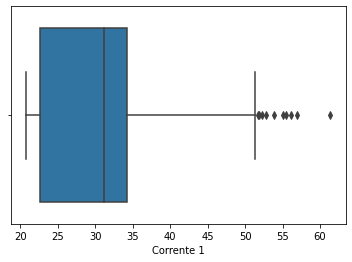

In [17]:
import seaborn as sns

display(sns.boxplot(data=df, x=("Corrente 1"),orient="h"))

### Agrupe os dados (pela média por hora, etc)

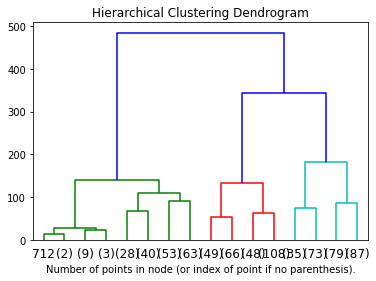

In [18]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#iris = load_iris()
X = df.iloc[0:, 26:36].values

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Normalize

In [19]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled, columns=df.columns)
df_norm

,HeliumProbe1Level,HeliumProbe2Level,HeliumRefLevel,HeliumMPSLevel,Link1Voltage,MagnetPressure,SwitchHeaterResistance,QuenchHeater1Resistance,QuenchHeater2Resistance,ColdHeadTemperature,Link1Temperature,Bore1Voltage,Bore1Temperature,ERDUBatteryVoltage,ERDUButtonVoltage,MagnetFieldCurrent,Carbon2Resistance,Carbon3Resistance,Carbon4Resistance,Turret1Voltage,Turret1Temperature,Turret2Voltage,Turret2Temperature,ColdHeadVoltage,PressureHeaterAveragePower,PressureHeaterDutyCycle,Corrente 1,Corrente 2,Corrente 3,Frequencia,Potência 1,Tensao 1,Tensao 2,Tensao 3,DiaColeta,HoraColeta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258024,0.297904,0.288258,0.365505,0.288887,0.351576,0.344962,0.364317,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258024,0.297904,0.288258,0.365505,0.288887,0.351576,0.344962,0.364317,0.0,0.043478
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258024,0.297904,0.288258,0.365505,0.288887,0.351576,0.344962,0.364317,0.0,0.086957
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258024,0.297904,0.288258,0.365505,0.288887,0.351576,0.344962,0.364317,0.0,0.130435
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258024,0.297904,0.288258,0.365505,0.288887,0.351576,0.344962,0.364317,0.0,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041171,0.025016,0.025794,0.732538,0.017603,0.331890,0.334211,0.357612,1.0,0.826087
740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040387,0.015360,0.034847,0.502740,0.016784,0.376769,0.366945,0.397758,1.0,0.869565
741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040824,0.019146,0.031954,0.323238,0.016763,0.395037,0.387204,0.414214,1.0,0.913043
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031067,0.045080,0.014940,0.321897,0.014835,0.269324,0.253920,0.283174,1.0,0.956522


In [20]:
df_norm.describe()

,HeliumProbe1Level,HeliumProbe2Level,HeliumRefLevel,HeliumMPSLevel,Link1Voltage,MagnetPressure,SwitchHeaterResistance,QuenchHeater1Resistance,QuenchHeater2Resistance,ColdHeadTemperature,Link1Temperature,Bore1Voltage,Bore1Temperature,ERDUBatteryVoltage,ERDUButtonVoltage,MagnetFieldCurrent,Carbon2Resistance,Carbon3Resistance,Carbon4Resistance,Turret1Voltage,Turret1Temperature,Turret2Voltage,Turret2Temperature,ColdHeadVoltage,PressureHeaterAveragePower,PressureHeaterDutyCycle,Corrente 1,Corrente 2,Corrente 3,Frequencia,Potência 1,Tensao 1,Tensao 2,Tensao 3,DiaColeta,HoraColeta
count,744.000000,744.000000,744.0,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,0.032208,0.032250,0.0,0.032250,0.032225,0.032057,0.032258,0.032201,0.032213,0.025104,0.031592,0.032228,0.031568,0.032204,0.032258,0.032258,0.032258,0.032254,0.032228,0.032238,0.030877,0.032230,0.030998,0.032189,0.001344,0.0,0.258024,0.297904,0.288258,0.365505,0.288887,0.351576,0.344962,0.364317,0.500000,0.500000
std,0.176532,0.176759,0.0,0.176759,0.176623,0.175703,0.176804,0.176493,0.176559,0.138001,0.173160,0.176636,0.173028,0.176505,0.176804,0.176804,0.176804,0.176784,0.176637,0.176695,0.169253,0.176647,0.169913,0.176426,0.036662,0.0,0.209951,0.261028,0.248944,0.107462,0.256840,0.107218,0.109773,0.108630,0.298343,0.301167
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.047053,0.030113,0.032308,0.336650,0.019014,0.310348,0.303451,0.321981,0.233333,0.250000
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.258024,0.297904,0.288258,0.365505,0.288887,0.351576,0.344962,0.364317,0.500000,0.500000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.331515,0.416967,0.393142,0.390523,0.396045,0.378498,0.373383,0.395052,0.766667,0.750000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Trabalhando apenas as colunas com menos valores faltantes
dados = df_norm.iloc[:,26:]
dados.sample(n=5)

,Corrente 1,Corrente 2,Corrente 3,Frequencia,Potência 1,Tensao 1,Tensao 2,Tensao 3,DiaColeta,HoraColeta
28,0.258024,0.297904,0.288258,0.365505,0.288887,0.351576,0.344962,0.364317,0.033333,0.173913
94,0.258024,0.297904,0.288258,0.365505,0.288887,0.351576,0.344962,0.364317,0.100000,0.956522
594,0.060246,0.017597,0.031318,0.210350,0.020894,0.393928,0.385373,0.415926,0.800000,0.782609
689,0.543126,0.592022,0.595630,0.287248,0.597398,0.418902,0.390981,0.415097,0.933333,0.739130
207,0.258024,0.297904,0.288258,0.365505,0.288887,0.351576,0.344962,0.364317,0.266667,0.652174


### Análise de correlações

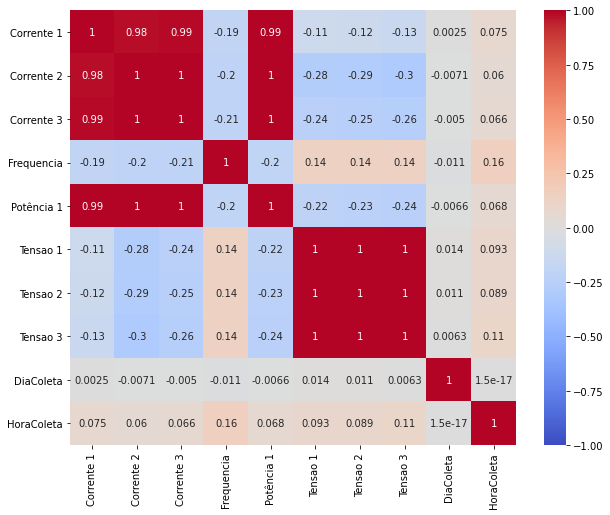

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#Matriz de correlação 
corr_matrix = dados.corr()
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt='.2g', vmin = -1,
            vmax = 1, center = 0, cmap = 'coolwarm')

### Treinar modelo de agrupamento

In [23]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i, max_iter=300)
  km.fit(dados)
  wcss.append(km.inertia_)

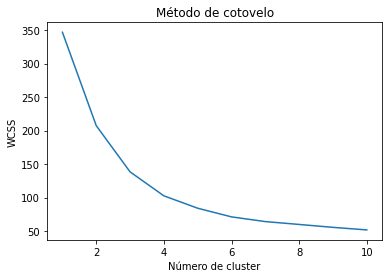

In [24]:
plt.plot(range(1,11), wcss)
plt.title('Método de cotovelo')
plt.xlabel('Número de cluster')
plt.ylabel('WCSS')
plt.show()

In [26]:
km = KMeans(n_clusters=4, max_iter=300)
km.fit(dados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
display(km.labels_)
display(km.labels_.shape)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1,

(744,)

In [28]:
km.cluster_centers_

array([[0.04690569, 0.03914329, 0.03950163, 0.35009949, 0.03054171,
        0.35598484, 0.35032667, 0.3672559 , 0.68791946, 0.14969361],
       [0.57635048, 0.6962565 , 0.66902215, 0.33237395, 0.68171678,
        0.3134683 , 0.30432769, 0.32227329, 0.68693182, 0.53186759],
       [0.26377049, 0.30639467, 0.2956907 , 0.36083835, 0.29735466,
        0.34853271, 0.3418532 , 0.36135605, 0.21205916, 0.5028936 ],
       [0.04966857, 0.02772711, 0.0332793 , 0.44085006, 0.02598763,
        0.40667177, 0.40260654, 0.42645288, 0.68624339, 0.86300897]])

In [29]:
df['KMeans_Clusters'] = km.labels_
df.sample(n=5)

,HeliumProbe1Level,HeliumProbe2Level,HeliumRefLevel,HeliumMPSLevel,Link1Voltage,MagnetPressure,SwitchHeaterResistance,QuenchHeater1Resistance,QuenchHeater2Resistance,ColdHeadTemperature,Link1Temperature,Bore1Voltage,Bore1Temperature,ERDUBatteryVoltage,ERDUButtonVoltage,MagnetFieldCurrent,Carbon2Resistance,Carbon3Resistance,Carbon4Resistance,Turret1Voltage,Turret1Temperature,Turret2Voltage,Turret2Temperature,ColdHeadVoltage,PressureHeaterAveragePower,PressureHeaterDutyCycle,Corrente 1,Corrente 2,Corrente 3,Frequencia,Potência 1,Tensao 1,Tensao 2,Tensao 3,DiaColeta,HoraColeta,KMeans_Clusters
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.238677,29.632494,28.326597,60.002183,16.917791,392.929872,394.243170,393.775400,2.0,15.0,2
366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.541329,27.911650,25.662699,60.012070,15.450503,390.195804,391.374825,390.800000,16.0,6.0,0
334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.712615,21.702266,20.483273,60.015077,11.850769,396.260140,397.521678,397.174825,14.0,22.0,3
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.428755,21.628713,20.706685,60.007287,11.816573,395.206993,396.373427,396.034965,26.0,6.0,0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.238677,29.632494,28.326597,60.002183,16.917791,392.929872,394.243170,393.775400,5.0,10.0,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HeliumProbe1Level           744 non-null    float64
 1   HeliumProbe2Level           744 non-null    float64
 2   HeliumRefLevel              744 non-null    float64
 3   HeliumMPSLevel              744 non-null    float64
 4   Link1Voltage                744 non-null    float64
 5   MagnetPressure              744 non-null    float64
 6   SwitchHeaterResistance      744 non-null    float64
 7   QuenchHeater1Resistance     744 non-null    float64
 8   QuenchHeater2Resistance     744 non-null    float64
 9   ColdHeadTemperature         744 non-null    float64
 10  Link1Temperature            744 non-null    float64
 11  Bore1Voltage                744 non-null    float64
 12  Bore1Temperature            744 non-null    float64
 13  ERDUBatteryVoltage          744 non

In [37]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Corrente 1  744 non-null    float64
 1   Corrente 2  744 non-null    float64
 2   Corrente 3  744 non-null    float64
 3   Frequencia  744 non-null    float64
 4   Potência 1  744 non-null    float64
 5   Tensao 1    744 non-null    float64
 6   Tensao 2    744 non-null    float64
 7   Tensao 3    744 non-null    float64
 8   DiaColeta   744 non-null    float64
 9   HoraColeta  744 non-null    float64
dtypes: float64(10)
memory usage: 58.2 KB


In [38]:
X = np.array(dados)
y = np.array(df['KMeans_Clusters'].astype(float))

In [39]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = km.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

1.0


## **ATÉ AQUI TÁ VALENDO**

In [87]:
from sklearn.model_selection import train_test_split

X = dados.values
y = dados['KMeans_Clusters']
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)
display(X_train.shape)
display(X_test.shape)

(520, 11)

(224, 11)

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test = X_test[:,:36]
X_test.shape

(224, 36)

In [ ]:
X_test[13]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  31.23867674,  29.63249391,
        28.32659654,  60.00218293,  16.91779116, 392.92987165,
       394.24317025, 393.77539975,   5.        ,   5.        ,
         0.        ])

In [ ]:
classe = clf.predict([X_test[13]])

print(df.KMeans_Clusters[classe])

0    0
Name: KMeans_Clusters, dtype: int32


In [ ]:

display(X_test.shape)
km.fit(X_train, y_train)
km.score(X_test, y_test)

(224, 37)

-75032.63451408094

In [ ]:
from sklearn.metrics import classification_report
y_true = y_train
y_pred = 
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
df.iloc[0].values

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  31.23867674,  29.63249391,
        28.32659654,  60.00218293,  16.91779116, 392.92987165,
       394.24317025, 393.77539975,   1.        ,   0.        ,
         4.        ])

In [ ]:
df.iloc[0]

HeliumProbe1Level               0.000000
HeliumProbe2Level               0.000000
HeliumRefLevel                  0.000000
HeliumMPSLevel                  0.000000
Link1Voltage                    0.000000
MagnetPressure                  0.000000
SwitchHeaterResistance          0.000000
QuenchHeater1Resistance         0.000000
QuenchHeater2Resistance         0.000000
ColdHeadTemperature             0.000000
Link1Temperature                0.000000
Bore1Voltage                    0.000000
Bore1Temperature                0.000000
ERDUBatteryVoltage              0.000000
ERDUButtonVoltage               0.000000
MagnetFieldCurrent              0.000000
Carbon2Resistance               0.000000
Carbon3Resistance               0.000000
Carbon4Resistance               0.000000
Turret1Voltage                  0.000000
Turret1Temperature              0.000000
Turret2Voltage                  0.000000
Turret2Temperature              0.000000
ColdHeadVoltage                 0.000000
PressureHeaterAv

In [ ]:
prev = pd.DataFrame(X_test)
prev

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.536671,22.047007,20.422559,59.996350,11.816545,393.783217,395.373427,395.121678,26.0,9.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.428825,38.144028,38.225189,60.001105,22.957427,392.455944,393.648951,393.313287,23.0,11.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.630559,22.295371,20.434629,60.006755,11.736937,389.710489,391.034965,390.629371,29.0,22.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.891972,41.681622,38.839483,59.996783,24.526923,390.302098,391.790210,391.183217,15.0,14.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.238677,29.632494,28.326597,60.002183,16.917791,392.929872,394.243170,393.775400,8.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.155189,22.140545,20.609063,60.012448,11.806923,392.400000,393.801399,393.132867,16.0,3.0,0.0
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.869189,33.172923,29.864434,60.001790,18.917147,391.116084,392.692308,392.121678,20.0,14.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.171287,36.259427,35.344462,60.001692,21.045762,388.779021,390.434965,389.937063,31.0,11.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.600476,37.484573,35.588881,60.003748,21.636951,389.875524,391.029371,390.686713,13.0,18.0,0.0
